<a href="https://colab.research.google.com/github/simbelus13/CompBio-Workshop-Day03/blob/main/CompBio_Day_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/mirsazzathossain/compbio-bracu/blob/main/day_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Day 03: Interdisciplinary Computational Biology workshop 2025**

### **1. Import Libraries**

To get started, we need to import a set of essential libraries that will help us perform various tasks:

- **`numpy`**: For efficient numerical computations.
- **`pandas`**: To handle and manipulate structured data.
- **`matplotlib` and `seaborn`**: For creating insightful visualizations.
- **`sklearn`**: To build and evaluate machine learning models.

Let's import them now!


In [177]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
from imblearn.over_sampling import SMOTE
from imblearn.ensemble import BalancedBaggingClassifier
import shap
import warnings
warnings.filterwarnings("ignore")

### **2. Load Data**

For this task, you are provided with data files containing information about different proteins. Each group is assigned a specific protein dataset, and they will focus on analyzing and processing their assigned file.

Protein Files for Groups:

- Group 1: `akt1.csv`
- Group 2: `casp3.csv`
- Group 3: `pa2ga.csv`
- Group 4: `cxcr4.csv`
- Group 5: `cp3a4.csv`

Each group should load their assigned protein file into a pandas DataFrame for further analysis. Use the `pd.read_csv()` function to load the data, and display the first few rows of the DataFrame to understand the available columns and data points.


In [178]:
# Load the data
data = pd.read_csv('ampc.csv')

### **3. Explore the Dataset**

To begin working with the dataset, it is essential to understand its structure and key statistics.

**Tasks for Exploration**:

1. Use `.info()` to check the dataset's structure, including the number of rows, columns, and data types
2. Use `.describe()` to summarize the statistics of all numerical features.

**Things to Observe**:

- Are there any missing values in the dataset?
- What are the ranges of the numerical features?
- Are the data types appropriate for analysis?


In [179]:
# Check dataset structure and info
print("\nDataset Information:")
print(data.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2898 entries, 0 to 2897
Data columns (total 24 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Name                                        2898 non-null   object 
 1   gauss(o=0_w=0.5_c=8)                        2898 non-null   float64
 2   gauss(o=3_w=2_c=8)                          2898 non-null   float64
 3   repulsion(o=0_c=8)                          2898 non-null   float64
 4   hydrophobic(g=0.5_b=1.5_c=8)                2898 non-null   float64
 5   non_hydrophobic(g=0.5_b=1.5_c=8)            2898 non-null   float64
 6   vdw(i=6_j=12_s=1_^=100_c=8)                 2898 non-null   float64
 7   non_dir_h_bond_lj(o=-0.7_^=100_c=8)         2898 non-null   float64
 8   non_dir_anti_h_bond_quadratic(o=0_c=8)      2898 non-null   float64
 9   non_dir_h_bond(g=-0.7_b=0_c=8)              2898 non-null   flo

In [180]:
print("\nBasic Statistics:")
print(data.describe())


Basic Statistics:
       gauss(o=0_w=0.5_c=8)  gauss(o=3_w=2_c=8)  repulsion(o=0_c=8)  \
count           2898.000000         2898.000000         2898.000000   
mean              59.504800          895.579207            1.445304   
std               15.764036          224.093896            0.710236   
min                3.998660          218.268930            0.011550   
25%               47.853747          739.183850            0.936683   
50%               58.171440          899.299860            1.342770   
75%               69.657325         1046.347053            1.824272   
max              118.598060         1644.298850            6.468390   

       hydrophobic(g=0.5_b=1.5_c=8)  non_hydrophobic(g=0.5_b=1.5_c=8)  \
count                   2898.000000                       2898.000000   
mean                      20.840218                         57.342435   
std                       10.969207                         20.154854   
min                        0.000000              

In [181]:
print("\nUnique Values in Each Column incase of categorical variables:")
print(data.nunique())


Unique Values in Each Column incase of categorical variables:
Name                                          2895
gauss(o=0_w=0.5_c=8)                          2897
gauss(o=3_w=2_c=8)                            2898
repulsion(o=0_c=8)                            2883
hydrophobic(g=0.5_b=1.5_c=8)                  2856
non_hydrophobic(g=0.5_b=1.5_c=8)              2898
vdw(i=6_j=12_s=1_^=100_c=8)                   2898
non_dir_h_bond_lj(o=-0.7_^=100_c=8)           2898
non_dir_anti_h_bond_quadratic(o=0_c=8)        1814
non_dir_h_bond(g=-0.7_b=0_c=8)                2867
acceptor_acceptor_quadratic(o=0_c=8)          2409
donor_donor_quadratic(o=0_c=8)                 504
electrostatic(i=2_^=100_c=8)                  2813
ad4_solvation(d-sigma=3.6_s/q=0.01097_c=8)    2897
num_tors_add                                    10
num_tors_sqr                                    10
num_tors_sqrt                                   10
num_tors_div                                     1
num_tors_div_simple

### **Part 4: Visualizing Numerical Features**

In this part, we will visualize the distribution and spread of numerical features using histograms and boxplots to better understand the statistics from the `describe()` function.

#### **4.1 Histograms**:

Histograms help visualize the distribution of numerical data. By adding a Kernel Density Estimate (KDE), we can see the shape and spread of the data.

**Instructions:**

1. Complete the code to loop through each numerical column.
2. Plot a histogram with a KDE for each numerical feature.
3. Observe the shape and spread of the distributions.


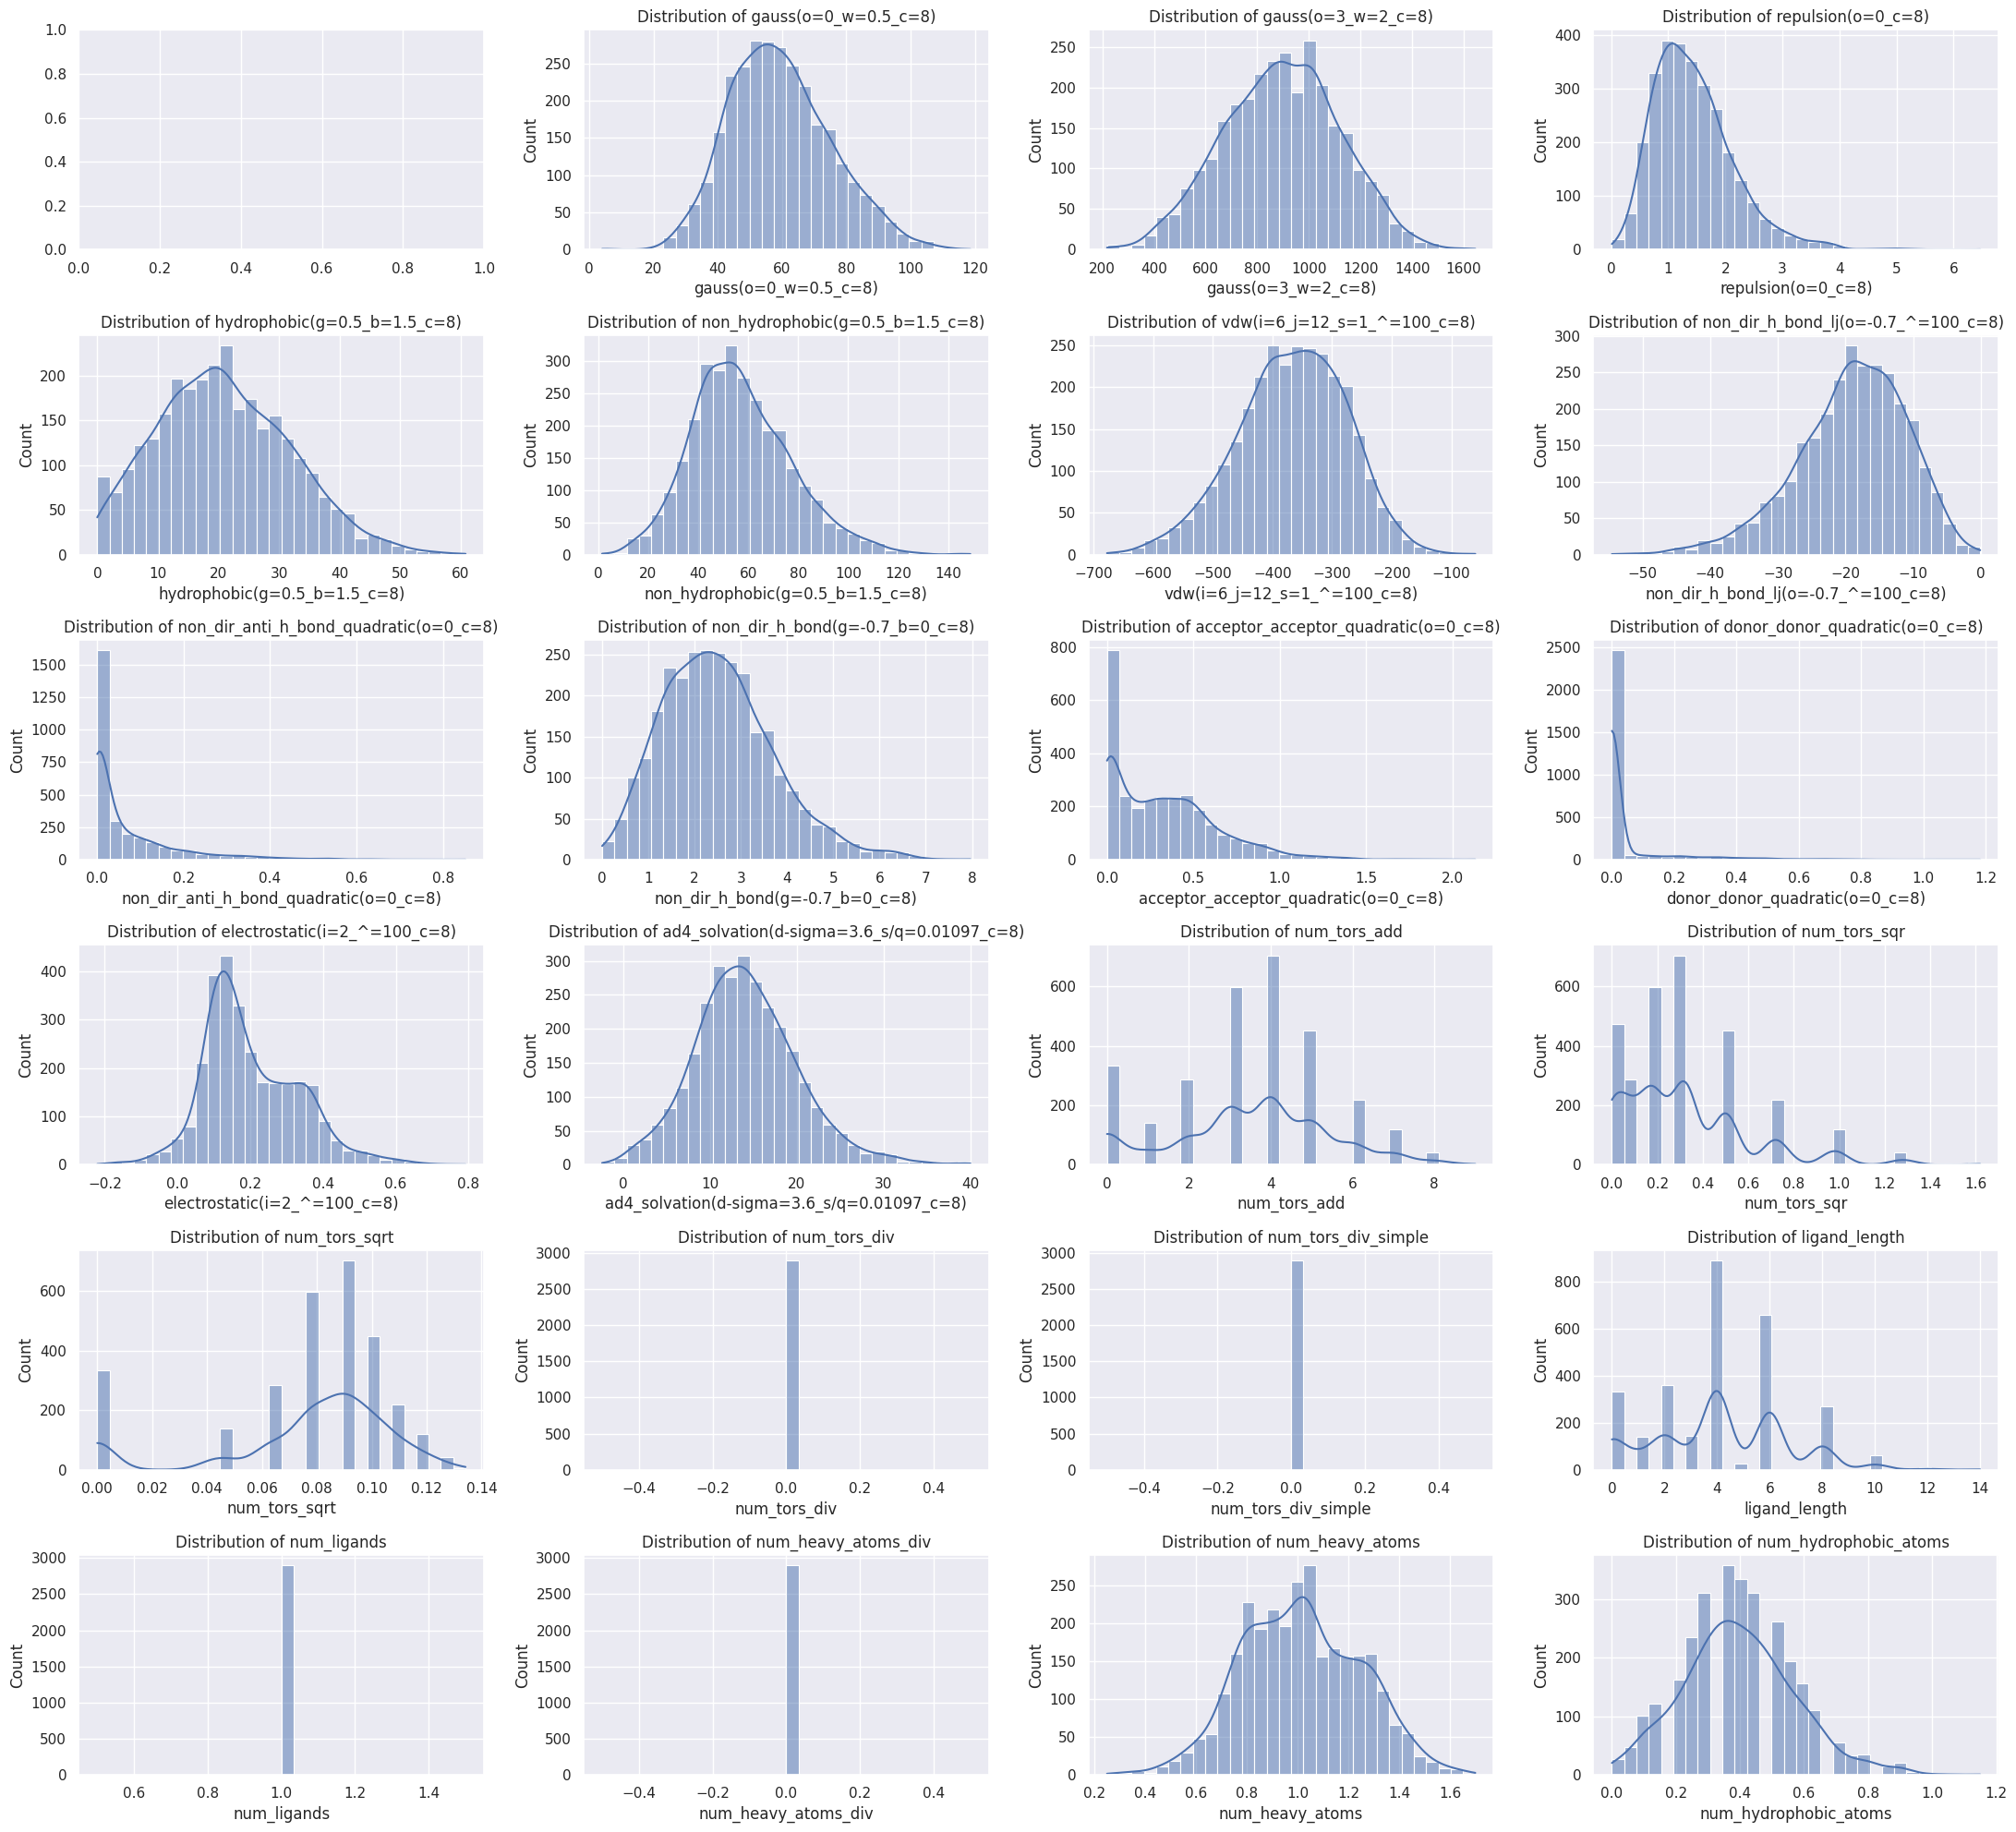

In [182]:
# Set the style to darkgrid
sns.set(style="darkgrid")

# Create a 6x4 grid of histograms
fig, axes = plt.subplots(6, 4, figsize=(22, 20))
axes = axes.ravel()

# Iterate over each column and plot the histogram
for i, column in enumerate(data.columns):
    if data[column].dtype != "object":  # Only plot numerical columns
        sns.histplot(data=data, x=column, kde=True, bins=30, ax=axes[i])
        axes[i].set_title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

#### **4.2 Boxplot**

Boxplots provide a summary of the data's distribution by displaying the median, quartiles, and potential outliers. They help us visually assess the spread of values and highlight any extreme values.

![boxplot](https://miro.medium.com/v2/resize:fit:700/0*XG2sFucPoFMg6NeV.png)

**Instructions**:

1. Complete the code to loop through each numerical column.
2. Plot a boxplot for each numerical feature.
3. Identify the median, IQR, and any outliers in the data.


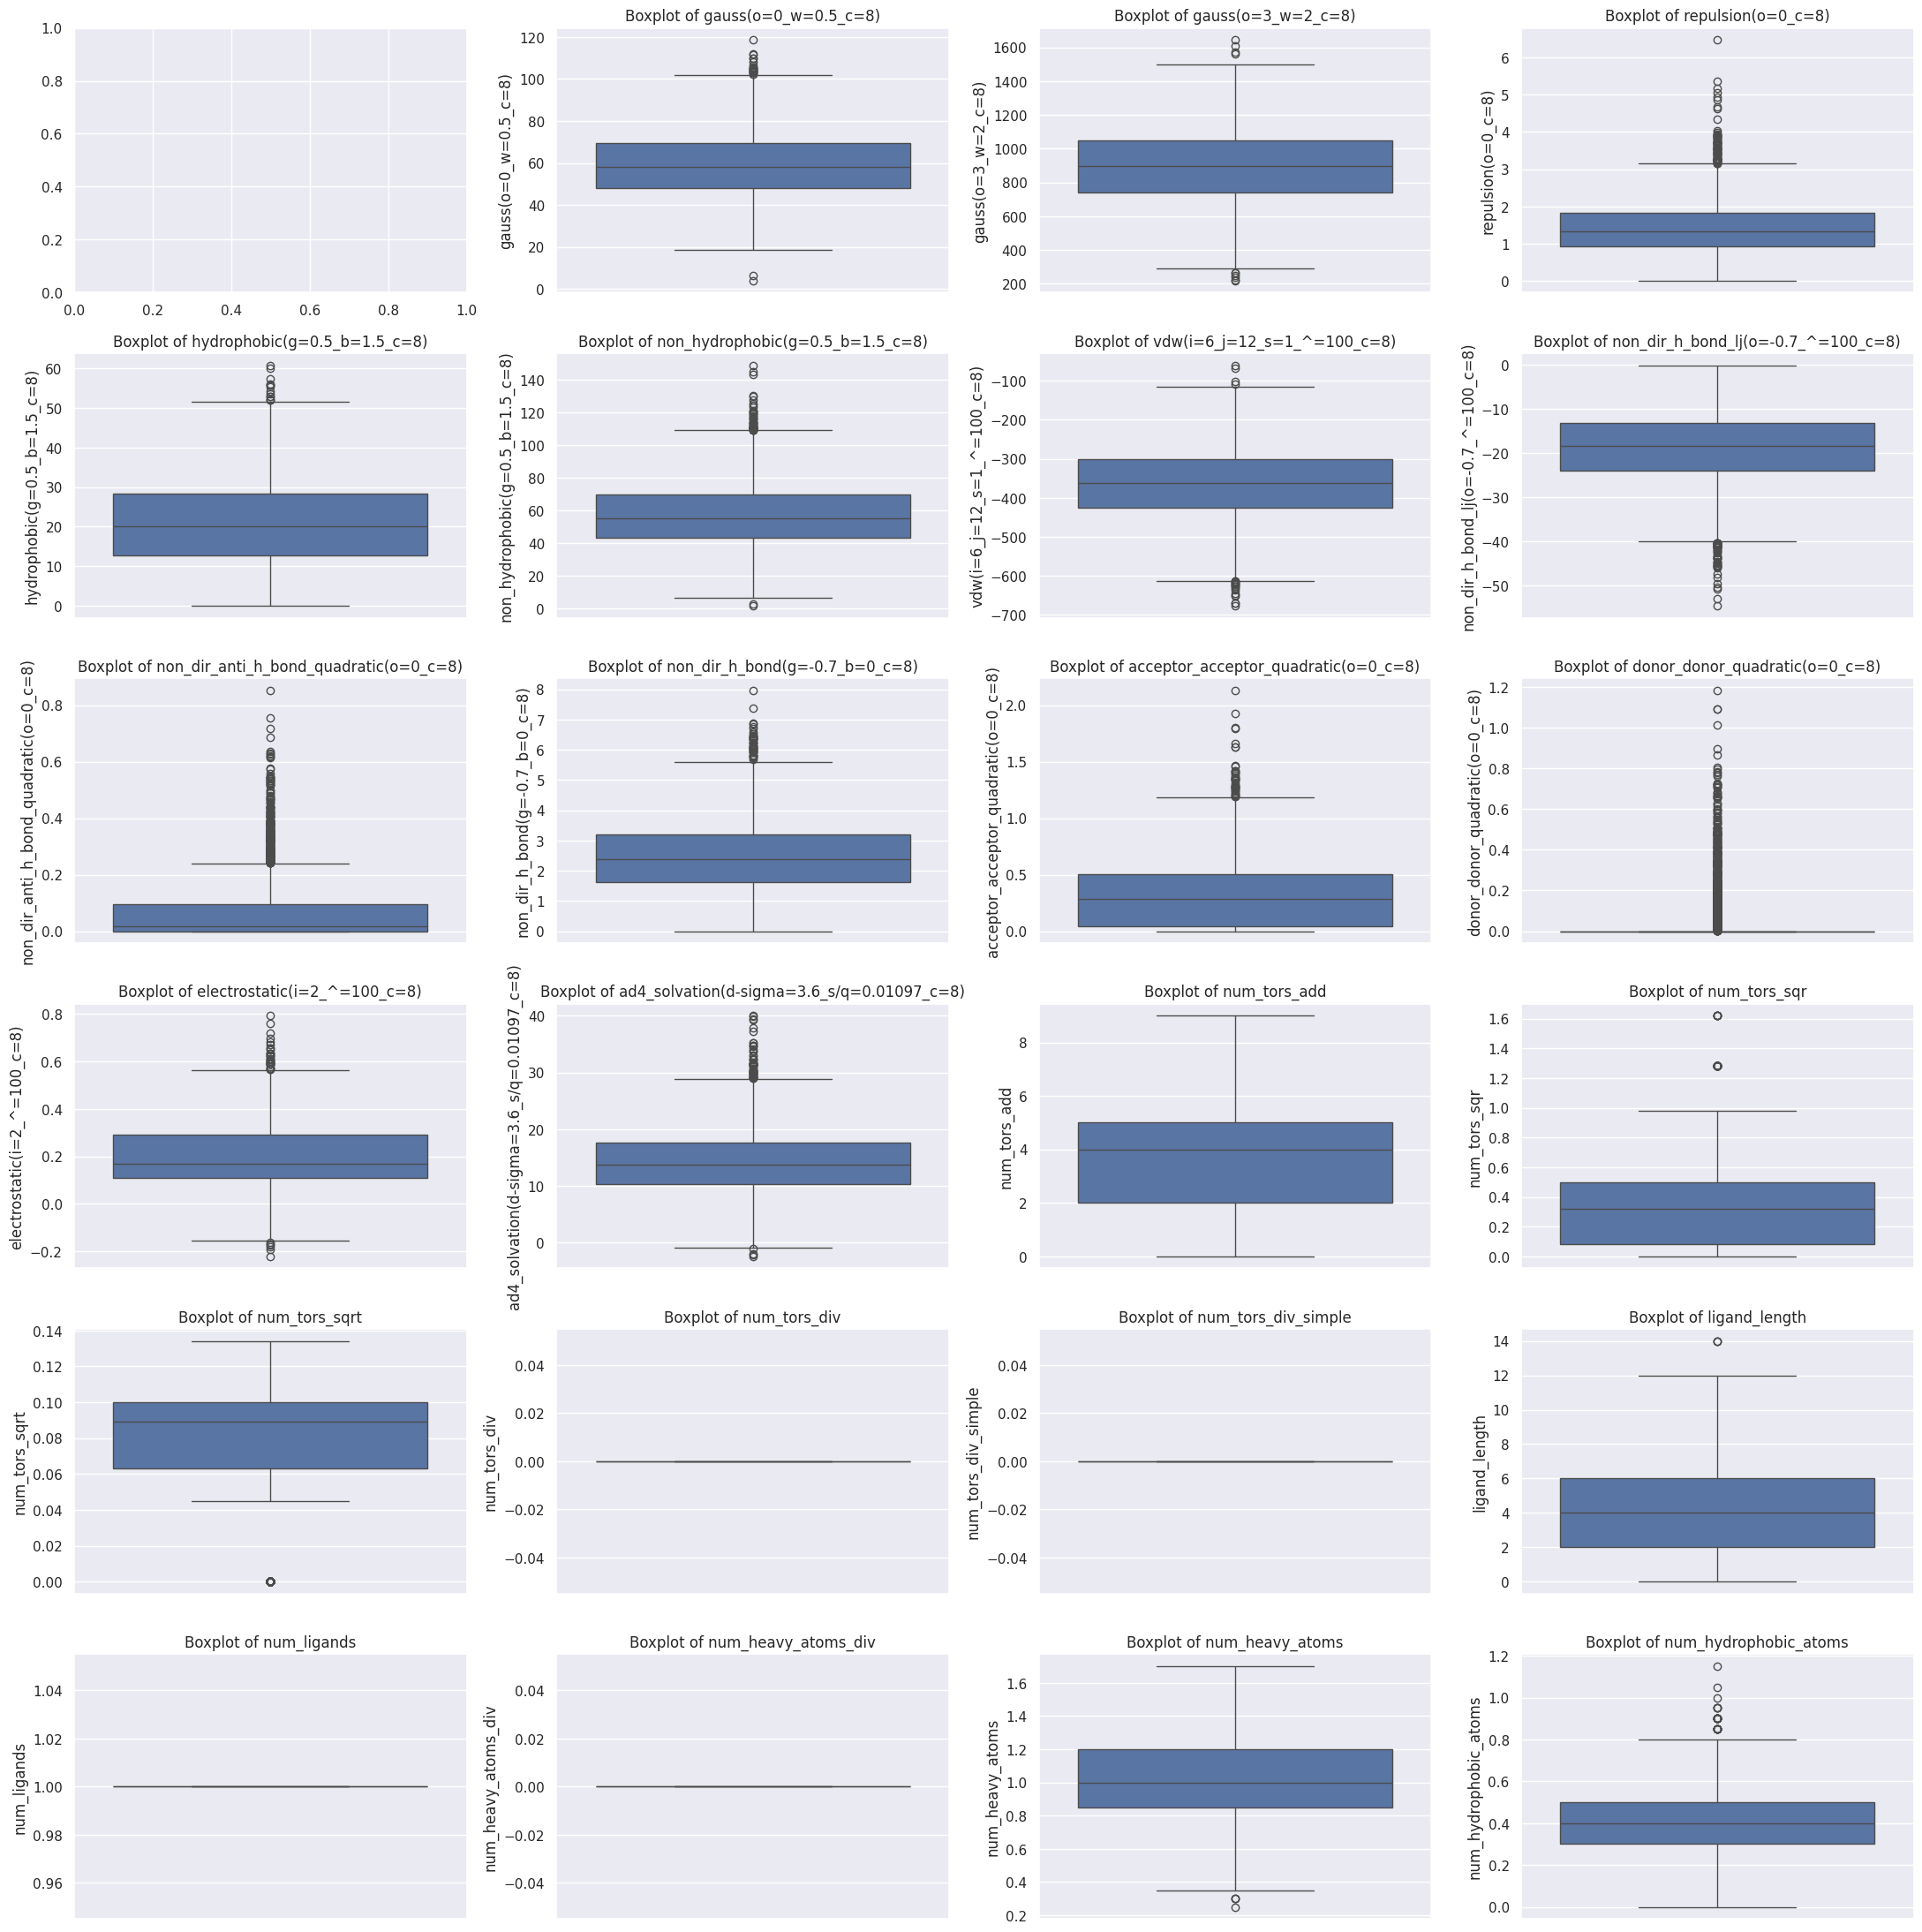

In [183]:
# Create a new figure for boxplots
fig, axes = plt.subplots(6, 4, figsize=(22, 22))
axes = axes.ravel()

# Iterate over each column and plot the boxplot
for i, column in enumerate(data.columns):
    # Plot only if the column is numeric
    if data[column].dtype != "object":
        sns.boxplot(data=data, y=column, ax=axes[i])
        axes[i].set_title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()


### **5. Data Preprocessing**

#### **5.1 Data Cleaning**

Based on the observations from the dataset, you might need to clean the data before building the machine learning model. Here are some important observations you might consider:

1. **Convert Categorical Variables:** The `Name` column is the target variable and is of type `object`. If the name ends with `act1` or `ac1`, it belongs to one class (Class 1), and if it ends with `decoy1`, it belongs to another class (Class 0). Convert this to numerical values (0 and 1).

2. **Handle Constant Features:** From the histograms and describe() output, we notice that certain features have a constant value (e.g., std = 0), indicating that they do not vary and are not informative for the model. We'll drop these features, using the `drop()` function.


In [184]:
# Convert the Name column to binary classification
# 1 for active compounds (act1 or ac1) and 0 for decoys (decoy1)
data['Name'] = data['Name'].apply(lambda x: 1 if ('act1' in x or 'ac1' in x) else 0)

# Print value counts to see class distribution
print("\nClass Distribution:")
print(data['Name'].value_counts())

# Find and drop constant columns (columns with only one unique value)
constant_columns = [col for col in data.columns if data[col].nunique() == 1]
data = data.drop(columns=constant_columns)
print("\nDropped constant columns:", constant_columns)


Class Distribution:
Name
0    2898
Name: count, dtype: int64

Dropped constant columns: ['Name', 'num_tors_div', 'num_tors_div_simple', 'num_ligands', 'num_heavy_atoms_div']


Column names in our dataset:
['gauss(o=0_w=0.5_c=8)', 'gauss(o=3_w=2_c=8)', 'repulsion(o=0_c=8)', 'hydrophobic(g=0.5_b=1.5_c=8)', 'non_hydrophobic(g=0.5_b=1.5_c=8)', 'vdw(i=6_j=12_s=1_^=100_c=8)', 'non_dir_h_bond_lj(o=-0.7_^=100_c=8)', 'non_dir_anti_h_bond_quadratic(o=0_c=8)', 'non_dir_h_bond(g=-0.7_b=0_c=8)', 'acceptor_acceptor_quadratic(o=0_c=8)', 'donor_donor_quadratic(o=0_c=8)', 'electrostatic(i=2_^=100_c=8)', 'ad4_solvation(d-sigma=3.6_s/q=0.01097_c=8)', 'num_tors_add', 'num_tors_sqr', 'num_tors_sqrt', 'ligand_length', 'num_heavy_atoms', 'num_hydrophobic_atoms']


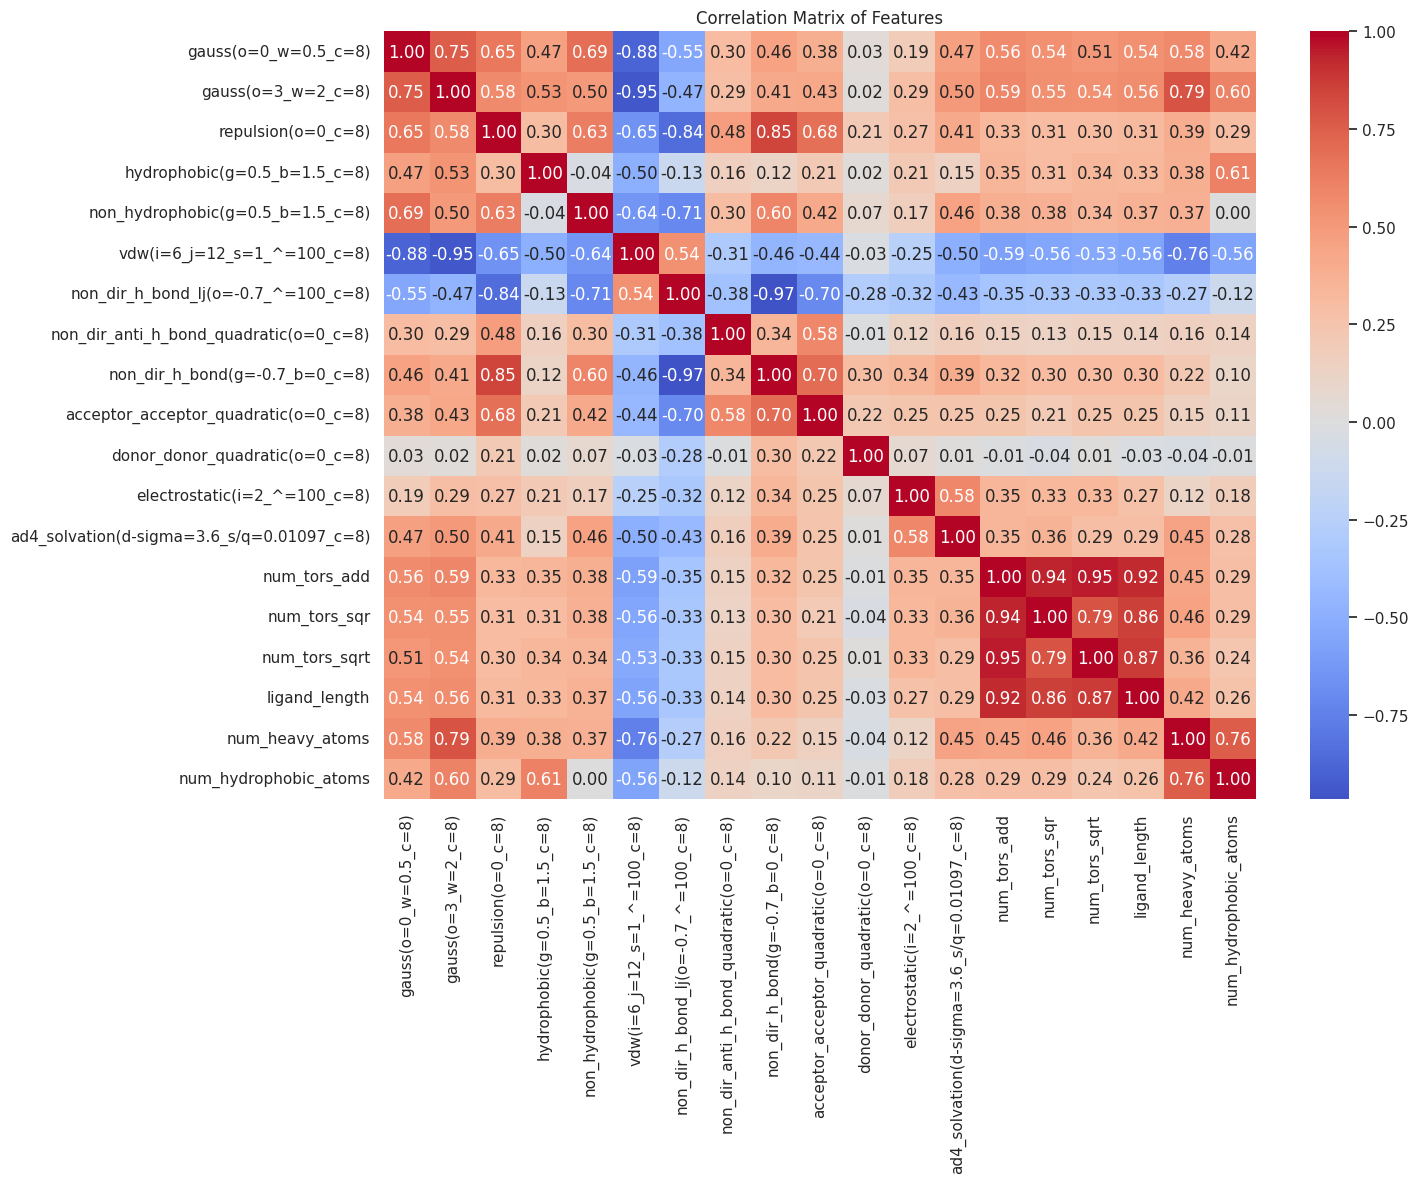

In [185]:
# First, let's see what columns we have
print("Column names in our dataset:")
print(data.columns.tolist())

# Now let's modify the correlation matrix code
# Calculate correlations between features
correlation_matrix = data.corr()

# Create a heatmap of correlations
plt.figure(figsize=(15, 12))
sns.heatmap(
    correlation_matrix,
    annot=True,          # Show correlation values
    cmap='coolwarm',     # Blue-red color scheme
    center=0,            # Center the color scale at 0
    fmt='.2f'           # Show 2 decimal places
)
plt.title('Correlation Matrix of Features')
plt.tight_layout()
plt.show()

#### **5.2 Feature Selection**

To identify the most relevant features for your machine learning model, you can start with a correlation matrix and then visualize the feature relationships.

1. **Correlation Matrix**:  
   A correlation matrix helps identify the relationships between features. Correlation values range from -1 to 1:

   - A value close to **1** indicates a strong positive correlation.
   - A value close to **-1** indicates a strong negative correlation.
   - A value close to **0** indicates weak or no correlation.

   Use `df.corr()` to calculate the correlation matrix and `sns.heatmap()` to visualize it. Remove highly correlated features to reduce multicollinearity.

2. **Pairplot**:  
   To visualize the relationships between these features further, you can create a pairplot using the `sns.pairplot()` function. This plot displays the pairwise relationships in a dataset, making it easier to identify patterns.


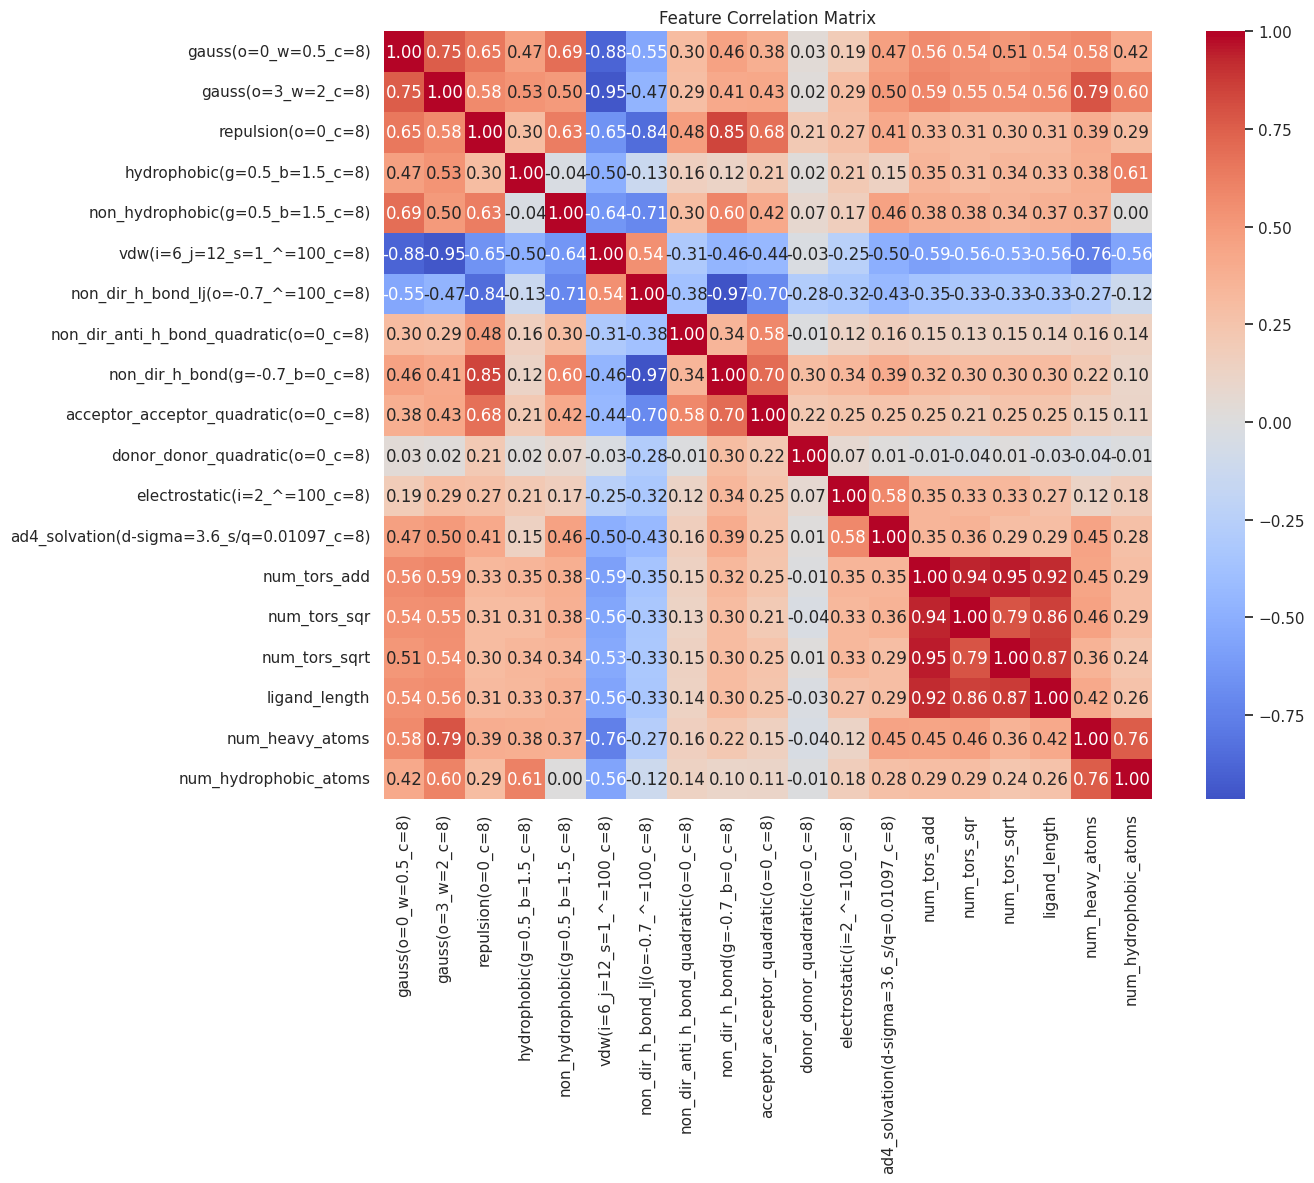

In [186]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Create heatmap visualization
plt.figure(figsize=(15, 12))
sns.heatmap(
    correlation_matrix,
    annot=True,          # Show correlation values
    cmap='coolwarm',     # Blue-red color scheme
    center=0,            # Center the color scale at 0
    fmt='.2f',          # Show 2 decimal places
    square=True         # Make plot square-shaped
)
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

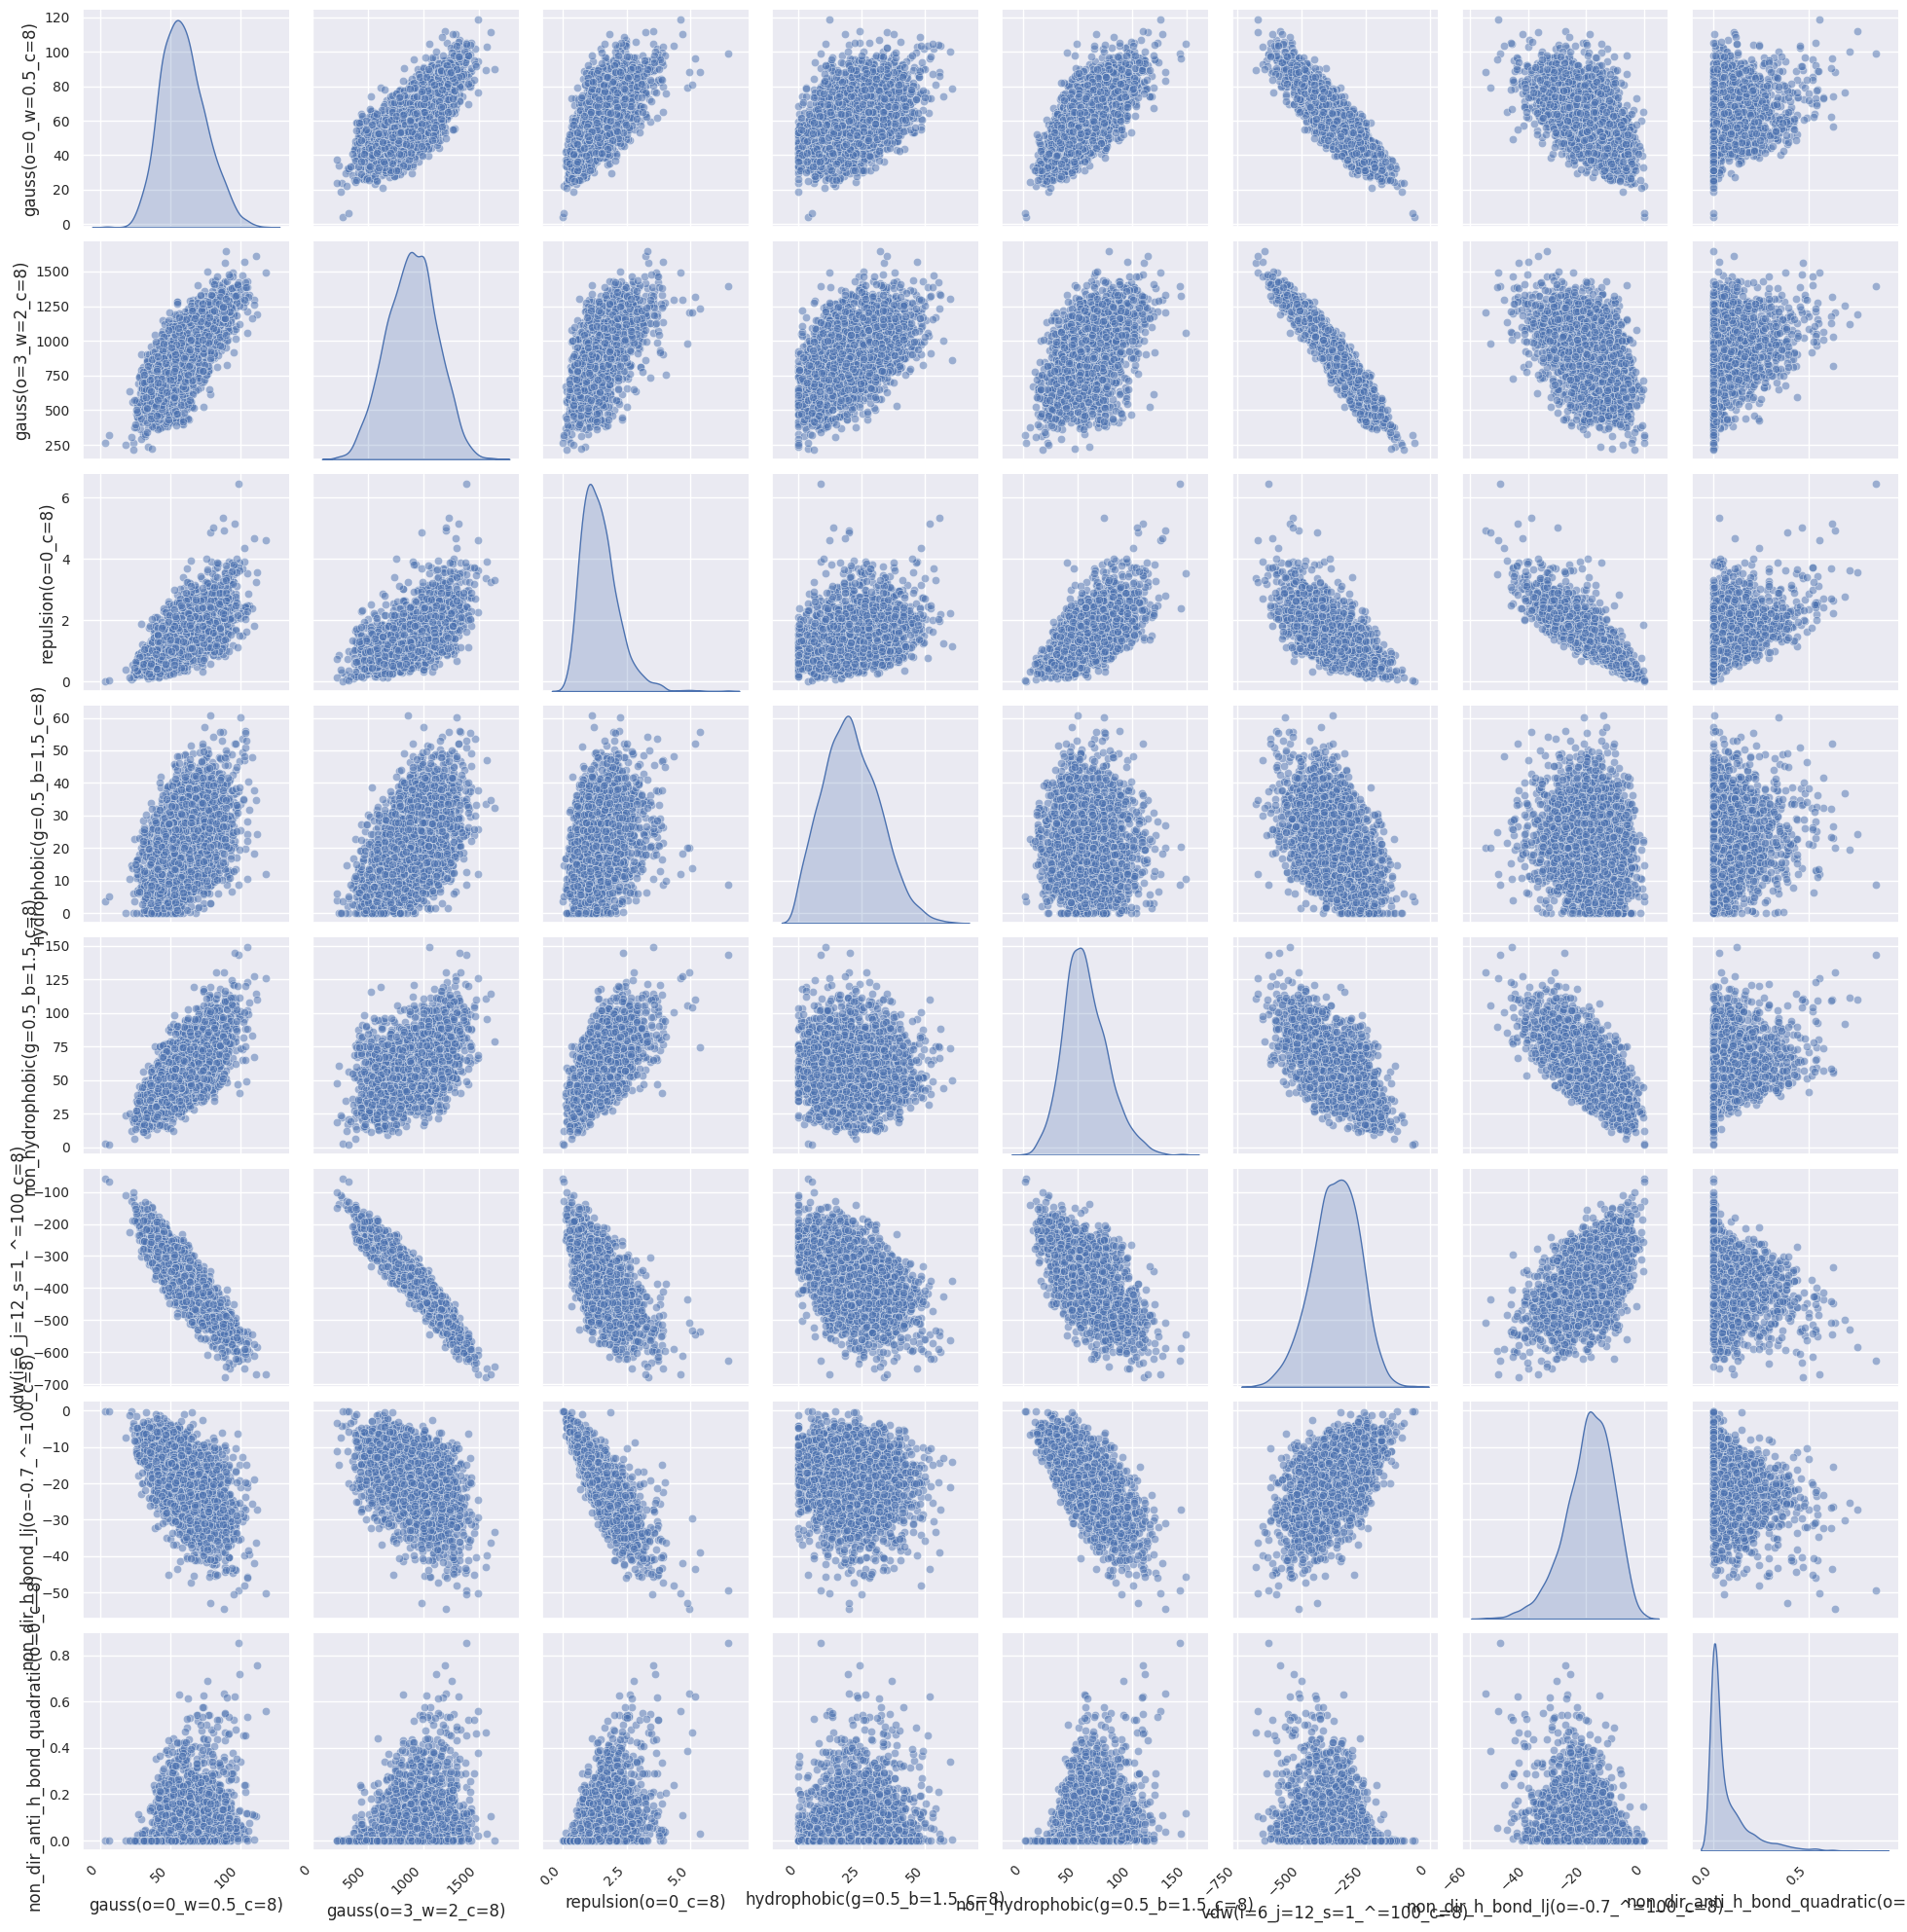

In [208]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the features to plot (showing 8 features)
features_to_plot = data.columns[:8]

# Create the pairplot with larger figure size
g = sns.pairplot(
    data[features_to_plot],
    diag_kind='kde',
    plot_kws={'alpha': 0.5}
)

# Adjust tick labels for better visibility
for ax in g.axes.flatten():
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right', fontsize=10)
    plt.setp(ax.get_yticklabels(), fontsize=10)

plt.show()

Now based on the correlation matrix and pairplot, you can decide which features to keep for the machine learning model. Drop the unnecessary features from the dataset.


In [188]:
# Identify highly correlated features (correlation > 0.95)
high_corr_features = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.95:
            colname = correlation_matrix.columns[i]
            high_corr_features.append(colname)

# Remove duplicates
high_corr_features = list(set(high_corr_features))

# Drop highly correlated features
data = data.drop(columns=high_corr_features)
print("Dropped highly correlated features:", high_corr_features)

Dropped highly correlated features: ['non_dir_h_bond(g=-0.7_b=0_c=8)']


#### **5.3 Standardizing the Data**

Standardization is important to scale the features so that they have a mean of 0 and a standard deviation of 1. This ensures that each feature contributes equally to the model, especially for algorithms sensitive to feature scales.

**Action**:

1. Use `StandardScaler` from `sklearn.preprocessing` to standardize the features.
2. Apply the scaler to all features, excluding the target variable.
3. Replace the original features with the standardized values in the DataFrame.


In [189]:
# First, let's separate our features and target
# We'll keep one column out as our target variable (we'll use the first column as target)
target = data.iloc[:, 0]  # First column as target
features = data.iloc[:, 1:]  # Rest of the columns as features

# Create a StandardScaler object
scaler = StandardScaler()

# Fit and transform the features
# We only scale the features, not the target variable
scaled_features = scaler.fit_transform(features)

# Convert the scaled features back to a DataFrame to maintain column names
scaled_df = pd.DataFrame(
    scaled_features,
    columns=features.columns,
    index=features.index
)

# Add back the target variable to our scaled dataset
scaled_df = pd.concat([target, scaled_df], axis=1)

# Verify the scaling worked by checking mean and standard deviation
print("\nMeans of scaled features (should be close to 0):")
print(scaled_df.iloc[:, 1:].mean())
print("\nStandard deviations of scaled features (should be close to 1):")
print(scaled_df.iloc[:, 1:].std())


Means of scaled features (should be close to 0):
gauss(o=3_w=2_c=8)                           -1.532399e-16
repulsion(o=0_c=8)                            1.716287e-16
hydrophobic(g=0.5_b=1.5_c=8)                 -2.795096e-16
non_hydrophobic(g=0.5_b=1.5_c=8)             -1.471103e-16
vdw(i=6_j=12_s=1_^=100_c=8)                   3.616461e-16
non_dir_h_bond_lj(o=-0.7_^=100_c=8)           2.059544e-16
non_dir_anti_h_bond_quadratic(o=0_c=8)       -2.206654e-17
acceptor_acceptor_quadratic(o=0_c=8)         -2.182136e-16
donor_donor_quadratic(o=0_c=8)               -1.961471e-17
electrostatic(i=2_^=100_c=8)                  1.961471e-16
ad4_solvation(d-sigma=3.6_s/q=0.01097_c=8)   -7.355515e-18
num_tors_add                                 -8.336250e-17
num_tors_sqr                                  1.471103e-17
num_tors_sqrt                                 2.059544e-16
ligand_length                                 1.127846e-16
num_heavy_atoms                              -7.478107e-16
num_hy

#### **5.4 Separating the Target and Features**

Before building the machine learning model, you need to separate the target variable from the feature variables.

**Action**:

1. Create a variable `X` containing all feature columns and another variable `y` containing the target column.
2. Check the shape of `X` and `y` to ensure they are correct.


In [190]:
# Let's first print our columns to make sure we know what we're working with
print("Available columns in our dataset:")
print(scaled_df.columns.tolist())

# Separate features (X) and target variable (y)
# We use the first column as our target, and everything else as features
X = scaled_df.iloc[:, 1:]  # All columns except the first one
y = scaled_df.iloc[:, 0]   # First column only

# Print the shapes to verify our split is correct
print("\nShape of feature matrix (X):", X.shape)
print("Shape of target vector (y):", y.shape)

# Display first few rows of features and target to verify the split
print("\nFirst few rows of features (X):")
print(X.head())
print("\nFirst few values of target (y):")
print(y.head())

Available columns in our dataset:
['gauss(o=0_w=0.5_c=8)', 'gauss(o=3_w=2_c=8)', 'repulsion(o=0_c=8)', 'hydrophobic(g=0.5_b=1.5_c=8)', 'non_hydrophobic(g=0.5_b=1.5_c=8)', 'vdw(i=6_j=12_s=1_^=100_c=8)', 'non_dir_h_bond_lj(o=-0.7_^=100_c=8)', 'non_dir_anti_h_bond_quadratic(o=0_c=8)', 'acceptor_acceptor_quadratic(o=0_c=8)', 'donor_donor_quadratic(o=0_c=8)', 'electrostatic(i=2_^=100_c=8)', 'ad4_solvation(d-sigma=3.6_s/q=0.01097_c=8)', 'num_tors_add', 'num_tors_sqr', 'num_tors_sqrt', 'ligand_length', 'num_heavy_atoms', 'num_hydrophobic_atoms']

Shape of feature matrix (X): (2898, 17)
Shape of target vector (y): (2898,)

First few rows of features (X):
   gauss(o=3_w=2_c=8)  repulsion(o=0_c=8)  hydrophobic(g=0.5_b=1.5_c=8)  \
0           -0.604550           -0.624610                     -0.528047   
1           -0.002060            0.904555                      0.450551   
2            0.235747            0.594928                      0.308341   
3            1.011994            1.984200    

### **6. Model Building**

Now that the data is preprocessed and ready, you can proceed with building a machine learning model.

#### **6.1 Train-Test Split**

Before training the model, split the data into training and testing sets. This allows you to train the model on one set of data and test its performance on unseen data.

- Use `train_test_split` from `sklearn.model_selection` to split the data. The typical split ratio is 80% training and 20% testing.
- Set `stratify=y` to ensure that the class distribution is similar in both training and testing sets.


In [191]:
# Check the distribution of our target variable
print("Target variable distribution:")
print(y.value_counts())

# Since we have an imbalanced dataset with some classes having very few samples,
# let's modify our train_test_split approach:

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,      # Keep 20% for testing
    random_state=42,    # For reproducibility
    stratify=None       # Remove stratification since we have too few samples
)

# Print the results of our split
print("\nTraining set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)
print("\nTraining set class distribution:")
print(y_train.value_counts())
print("\nTesting set class distribution:")
print(y_test.value_counts())

Target variable distribution:
gauss(o=0_w=0.5_c=8)
66.02497    2
51.45958    1
63.12533    1
74.15477    1
56.25420    1
           ..
77.21425    1
81.44217    1
83.60407    1
67.82563    1
89.82109    1
Name: count, Length: 2897, dtype: int64

Training set shape: (2318, 17)
Testing set shape: (580, 17)

Training set class distribution:
gauss(o=0_w=0.5_c=8)
66.02497    2
84.39571    1
55.10066    1
97.05523    1
53.44468    1
           ..
60.84892    1
45.80204    1
49.15944    1
29.83019    1
60.68947    1
Name: count, Length: 2317, dtype: int64

Testing set class distribution:
gauss(o=0_w=0.5_c=8)
48.68035    1
67.35468    1
80.35755    1
83.60407    1
52.25327    1
           ..
87.44468    1
72.37898    1
41.30408    1
60.24023    1
59.73306    1
Name: count, Length: 580, dtype: int64


#### **6.2 Model Selection**

For this task, you can choose any classification algorithm to build the model. Here are a few popular algorithms you can consider:

**Traditional Classifiers:**

- `LogisticRegression`
- `KNeighborsClassifier`
- `SVC` (Support Vector Classifier)
- `DecisionTreeClassifier`
- `RandomForestClassifier`
- `GradientBoostingClassifier`
- `AdaBoostClassifier`
- `XGBClassifier` (if using `XGBoost`)

**Deep Neural Network Classifier:**

- `MLPClassifier` (Multi-layer Perceptron from `sklearn.neural_network`)

Initialize the chosen model using appropriate parameters.


In [192]:
# First, let's examine our target variable
print("Current target variable values:")
print(y_train.head())
print("\nUnique values in target variable:")
print(np.unique(y_train))

# Convert target variable to binary classes
# We'll treat values above a threshold as 1 (active) and below as 0 (inactive)
# Let's use the median as our threshold
threshold = y_train.median()
y_train_binary = (y_train > threshold).astype(int)
y_test_binary = (y_test > threshold).astype(int)

print("\nAfter conversion to binary classes:")
print("Training set class distribution:")
print(y_train_binary.value_counts())
print("\nTesting set class distribution:")
print(y_test_binary.value_counts())

# Now let's create and fit our RandomForest model with the binary classes
rf_model = RandomForestClassifier(
    n_estimators=100,    # Number of trees
    max_depth=10,        # Maximum depth of trees
    min_samples_split=5, # Minimum samples for splitting
    random_state=42,     # For reproducibility
    n_jobs=-1           # Use all available cores
)

# Fit the model with our binary classes
rf_model.fit(X_train, y_train_binary)

# Check training accuracy
training_accuracy = rf_model.score(X_train, y_train_binary)
print("\nTraining accuracy:", round(training_accuracy * 100, 2), "%")

Current target variable values:
2136    31.86673
163     72.58590
1936    55.38762
252     43.98799
1860    43.41283
Name: gauss(o=0_w=0.5_c=8), dtype: float64

Unique values in target variable:
[  3.99866   6.26307  18.56942 ... 111.58454 112.07808 118.59806]

After conversion to binary classes:
Training set class distribution:
gauss(o=0_w=0.5_c=8)
0    1159
1    1159
Name: count, dtype: int64

Testing set class distribution:
gauss(o=0_w=0.5_c=8)
1    294
0    286
Name: count, dtype: int64

Training accuracy: 97.63 %


#### **6.3 Model Training**

Train the initialized model on the training data using the `fit()` function.


In [193]:
from time import time

# Train and time the model
start_time = time()
rf_model.fit(X_train, y_train_binary)
train_time = time() - start_time

# Get important features
features_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf_model.feature_importances_
}).nlargest(5, 'importance')

# Print results
print(f"Training completed in {train_time:.2f}s")
print(f"Train accuracy: {rf_model.score(X_train, y_train_binary):.3f}")
print(f"Test accuracy: {rf_model.score(X_test, y_test_binary):.3f}")
print("\nTop 5 features:")
print(features_df)

Training completed in 1.03s
Train accuracy: 0.976
Test accuracy: 0.864

Top 5 features:
                             feature  importance
4        vdw(i=6_j=12_s=1_^=100_c=8)    0.317293
0                 gauss(o=3_w=2_c=8)    0.164337
3   non_hydrophobic(g=0.5_b=1.5_c=8)    0.118285
1                 repulsion(o=0_c=8)    0.068760
15                   num_heavy_atoms    0.064319


#### **6.4 Predictions and Evaluation**

After training the model, make predictions on the test data and evaluate its performance using various metrics.

**1. Predictions:**

Use the `predict()` function to predict the target values on the test set, and save them as `y_pred`.


In [194]:
# Generate predictions on the test set
y_pred = rf_model.predict(X_test)

# Get probability predictions (we'll need these for ROC curve)
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

print("Predictions completed!")
print("\nFirst few predictions vs actual values:")
print("Predicted  |  Actual")
print("-" * 20)
for pred, actual in zip(y_pred[:5], y_test_binary[:5]):
    print(f"{pred}         |  {actual}")

Predictions completed!

First few predictions vs actual values:
Predicted  |  Actual
--------------------
0         |  0
0         |  0
1         |  1
1         |  1
1         |  1


**2. Confusion Matrix:**

Wtrite a function to plot the confusion matrix to visualize the model's performance. Use `confusion_matrix` from `sklearn.metrics` and `heatmap` from `seaborn` to plot the matrix.


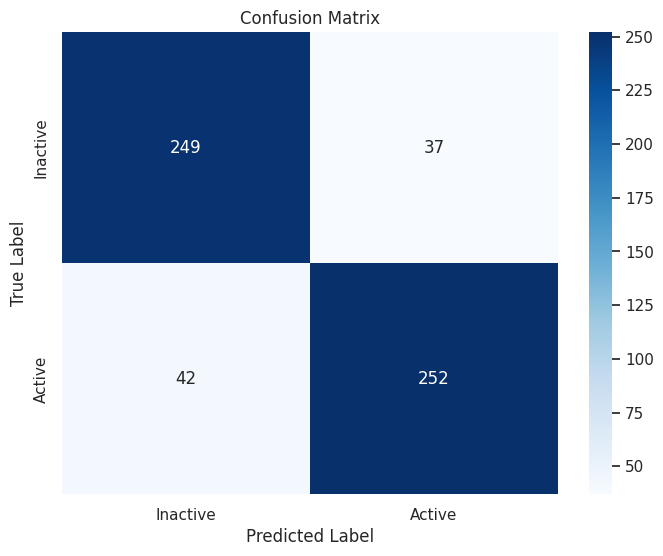


Confusion Matrix Interpretation:
True Negatives (Correctly predicted inactive): 249
False Positives (Incorrectly predicted active): 37
False Negatives (Incorrectly predicted inactive): 42
True Positives (Correctly predicted active): 252


In [195]:
# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred):
    # Calculate confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Create figure and plot
    plt.figure(figsize=(8, 6))
    sns.heatmap(
        cm,
        annot=True,           # Show numbers in cells
        fmt='d',              # Format as integers
        cmap='Blues',         # Blue color scheme
        xticklabels=['Inactive', 'Active'],
        yticklabels=['Inactive', 'Active']
    )
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

    # Print classification metrics
    print("\nConfusion Matrix Interpretation:")
    print(f"True Negatives (Correctly predicted inactive): {cm[0,0]}")
    print(f"False Positives (Incorrectly predicted active): {cm[0,1]}")
    print(f"False Negatives (Incorrectly predicted inactive): {cm[1,0]}")
    print(f"True Positives (Correctly predicted active): {cm[1,1]}")

# Plot confusion matrix
plot_confusion_matrix(y_test_binary, y_pred)

**3. ROC-AUC Curve:**

Plot the ROC-AUC curve to visualize the trade-off between the True Positive Rate and False Positive Rate. Use `roc_curve` and `auc` functions from `sklearn.metrics` to plot the curve.


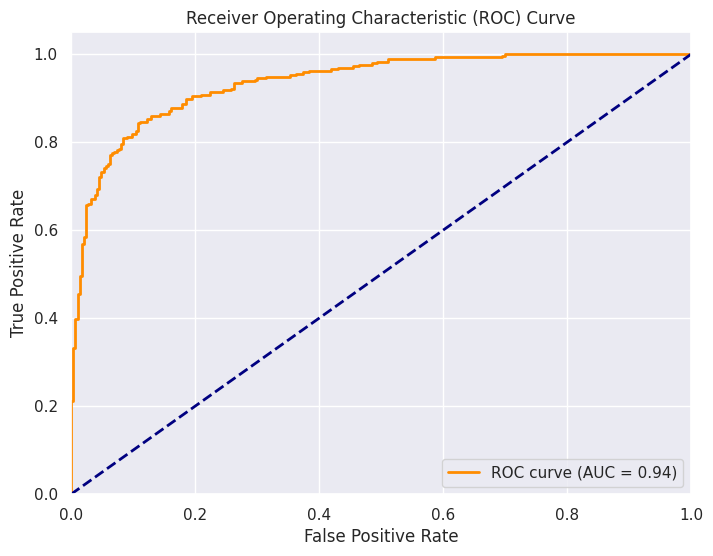


ROC Curve Interpretation:
AUC Score: 0.937
- AUC of 0.5 represents random prediction
- AUC of 1.0 represents perfect prediction


In [196]:
# Function to plot ROC curve
def plot_roc_curve(y_true, y_pred_proba):
    # Calculate ROC curve points
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    # Create plot
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2,
             label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

    print("\nROC Curve Interpretation:")
    print(f"AUC Score: {roc_auc:.3f}")
    print("- AUC of 0.5 represents random prediction")
    print("- AUC of 1.0 represents perfect prediction")

# Plot ROC curve
plot_roc_curve(y_test_binary, y_pred_proba)

**4. Evaluate the Model:**

Use the `classification_report` function from `sklearn.metrics` to print a summary of the model's performance, including precision, recall, F1-score, and accuracy. Plot the ROC-AUC curve and confusion matrix to visualize the model's performance.


In [197]:
from sklearn.metrics import accuracy_score, classification_report

# Print basic model performance
print("Model Performance Report")
print(classification_report(y_test_binary, y_pred))

# Print top features
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf_model.feature_importances_
}).nlargest(5, 'importance')
print("\nTop 5 Features:")
print(importance_df)

# Print accuracies
print(f"\nAccuracies - Train: {rf_model.score(X_train, y_train_binary):.3f}, Test: {rf_model.score(X_test, y_test_binary):.3f}")

Model Performance Report
              precision    recall  f1-score   support

           0       0.86      0.87      0.86       286
           1       0.87      0.86      0.86       294

    accuracy                           0.86       580
   macro avg       0.86      0.86      0.86       580
weighted avg       0.86      0.86      0.86       580


Top 5 Features:
                             feature  importance
4        vdw(i=6_j=12_s=1_^=100_c=8)    0.317293
0                 gauss(o=3_w=2_c=8)    0.164337
3   non_hydrophobic(g=0.5_b=1.5_c=8)    0.118285
1                 repulsion(o=0_c=8)    0.068760
15                   num_heavy_atoms    0.064319

Accuracies - Train: 0.976, Test: 0.864


### **7. Improving Model Performance**

In this section, we will focus on improving the model's performance by addressing the issues related to the classification of the active class, which has fewer data points. There are several techniques to handle imbalanced datasets:

- **Find the Optimal Threshold:** Adjust the classification threshold to balance precision and recall.
- **Resampling Techniques:** Oversample the minority class (SMOTE) or undersample the majority class to balance the class distribution.
- **Data Augmentation:** Generate synthetic samples by adding noise to the existing data points.
- **Balanced Bagging:** Use ensemble methods like BalancedRandomForestClassifier or EasyEnsemble to handle imbalanced datasets.

#### **7.1 Find the Optimal Threshold**

To find the optimal threshold, you can plot the Precision-Recall curve and identify the threshold that balances precision and recall. Use the `precision_recall_curve` function from `sklearn.metrics` to plot the curve.

**Steps**:

- Use `predict_proba` to get the probabilities of the positive class.
- Call the `precision_recall_curve` function to get the precision, recall, and threshold values.
- Calculate the F1-score using the precision and recall values.
  $$F1 = 2 * \frac{Precision * Recall}{Precision + Recall}$$
- Find the optimal threshold where the f1-score is maximum.
- Print the optimal threshold value.
- Calculate the `y_pred` from the probabilities using the optimal threshold. i.e., if the probability is greater than the threshold, predict 1; otherwise, predict 0.
- Evaluate the model using the confusion matrix, classification report, and ROC-AUC curve.


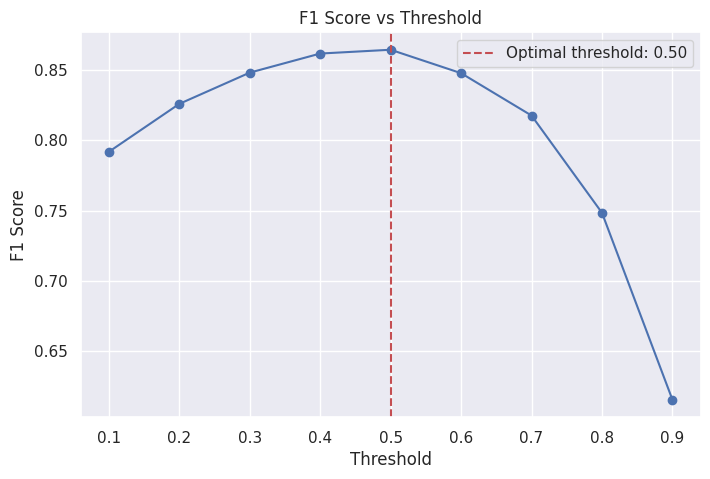


Optimal threshold: 0.50

Performance with optimal threshold:
              precision    recall  f1-score   support

           0       0.86      0.87      0.86       286
           1       0.87      0.86      0.86       294

    accuracy                           0.86       580
   macro avg       0.86      0.86      0.86       580
weighted avg       0.86      0.86      0.86       580



In [198]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report, roc_curve, auc

# Get probability predictions
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

# Test different thresholds and find the best one
thresholds = np.arange(0.1, 1.0, 0.1)
f1_scores = [f1_score(y_test_binary, (y_pred_proba >= t).astype(int)) for t in thresholds]

# Find optimal threshold
optimal_threshold = thresholds[np.argmax(f1_scores)]
y_pred_optimal = (y_pred_proba >= optimal_threshold).astype(int)

# Plot results
plt.figure(figsize=(8, 5))
plt.plot(thresholds, f1_scores, 'bo-')
plt.axvline(optimal_threshold, color='r', linestyle='--', label=f'Optimal threshold: {optimal_threshold:.2f}')
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.title('F1 Score vs Threshold')
plt.legend()
plt.show()

# Print results
print(f"\nOptimal threshold: {optimal_threshold:.2f}")
print("\nPerformance with optimal threshold:")
print(classification_report(y_test_binary, y_pred_optimal))

#### **7.2 Fix using Resampling Techniques**

If the model performance is still not satisfactory, you can try using resampling techniques to balance the class distribution. Use sklearn's `resample` function to oversample the minority class or undersample the majority class.

**Steps**:

- Split the data 'X' and 'y' into training and testing sets using `train_test_split`.
- Concatenate 'X_train' and 'y_train' to create a training dataset.
- Find the indices of the minority and majority classes. Use boolean indexing on the target variable.
- Use `resample` to oversample the minority class.
- Concatenate the resampled minority class with the majority class.
- Separate the target variable from the features.
- Train the model on the resampled data and evaluate its performance.


In [199]:
from sklearn.utils import resample

# Split data into majority and minority classes
train_data = pd.concat([X_train, pd.Series(y_train_binary, name='target')], axis=1)
majority = train_data[train_data.target == 0]
minority = train_data[train_data.target == 1]

# Upsample minority class
minority_upsampled = resample(minority, replace=True, n_samples=len(majority), random_state=42)
train_upsampled = pd.concat([majority, minority_upsampled]).sample(frac=1)

# Split features and target
X_train_balanced = train_upsampled.drop('target', axis=1)
y_train_balanced = train_upsampled.target

# Train and evaluate
rf_model.fit(X_train_balanced, y_train_balanced)
y_pred_balanced = rf_model.predict(X_test)
print("\nModel Performance after Balancing:")
print(classification_report(y_test_binary, y_pred_balanced))


Model Performance after Balancing:
              precision    recall  f1-score   support

           0       0.82      0.89      0.86       286
           1       0.89      0.81      0.85       294

    accuracy                           0.85       580
   macro avg       0.85      0.85      0.85       580
weighted avg       0.85      0.85      0.85       580



#### **7.3 Fix using SMOTE resampling**

Another popular technique to handle imbalanced datasets is Synthetic Minority Over-sampling Technique (SMOTE). It generates synthetic samples for the minority class by interpolating between existing samples.

**Steps**:

- Split the data 'X' and 'y' into training and testing sets using `train_test_split`.
- Use `SMOTE` from `imblearn.over_sampling` to resample the data.
- Split the data into training and testing sets.
- Initialize the SMOTE model with appropriate parameters.
- Fit the SMOTE model on the training data and resample it.
- Train the model on the resampled data and evaluate its performance.




In [200]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train_binary)

# Train and evaluate model with SMOTE-balanced data
rf_model.fit(X_train_smote, y_train_smote)
y_pred_smote = rf_model.predict(X_test)

print("Model Performance with SMOTE:")
print(classification_report(y_test_binary, y_pred_smote))

Model Performance with SMOTE:
              precision    recall  f1-score   support

           0       0.86      0.87      0.86       286
           1       0.87      0.86      0.86       294

    accuracy                           0.86       580
   macro avg       0.86      0.86      0.86       580
weighted avg       0.86      0.86      0.86       580



#### **7.4 Balanced Bagging**

Balanced Bagging is an ensemble method that combines multiple classifiers trained on balanced bootstrap samples. It helps improve the model's performance on imbalanced datasets. Use `BalancedBaggingClassifier` from `imblearn.ensemble` to train the model.

**Steps**:

- Split the data 'X' and 'y' into training and testing sets using `train_test_split`.
- Initialize the `BalancedBaggingClassifier` with the base classifier (e.g., DecisionTreeClassifier, RandomForestClassifier).
- Train the model on the training data.
- Evaluate the model's performance using the confusion matrix, classification report, and ROC-AUC curve.



In [201]:
from imblearn.ensemble import BalancedRandomForestClassifier

# Create and train a balanced random forest
balanced_rf = BalancedRandomForestClassifier(
    n_estimators=100,
    random_state=42
)
balanced_rf.fit(X_train, y_train_binary)

# Make predictions
y_pred_balanced = balanced_rf.predict(X_test)

print("Balanced Random Forest Performance:")
print(classification_report(y_test_binary, y_pred_balanced))

Balanced Random Forest Performance:
              precision    recall  f1-score   support

           0       0.86      0.87      0.86       286
           1       0.87      0.86      0.86       294

    accuracy                           0.86       580
   macro avg       0.86      0.86      0.86       580
weighted avg       0.86      0.86      0.86       580



#### **7.5 Augmenting Data**

Data augmentation is another technique to handle imbalanced datasets by generating synthetic samples. You can add noise to the existing data points to create new samples.

**Steps**:
- Split the data 'X' and 'y' into training and testing sets using `train_test_split`.
- Concatenate 'X_train' and 'y_train' to create a training dataset.
- Find the indices of the minority and majority classes. Use boolean indexing on the target variable.
- Use `resample` to oversample the minority class.
- Use `np.random.normal` to generate noise with the same shape as the upsampled minority class.
- Add the noise to the upsampled minority class to create augmented data.
- Concatenate the augmented data with the majority class.
- Separate the target variable from the features.
- Train the model on the augmented data and evaluate its performance.


In [202]:
# Augment data by adding random noise to minority class
train_data = pd.concat([X_train, pd.Series(y_train_binary, name='target')], axis=1)
majority = train_data[train_data.target == 0]
minority = train_data[train_data.target == 1]

# Add noise to minority class samples
minority_augmented = minority.copy()
minority_augmented.iloc[:, :-1] += np.random.normal(0, 0.01, minority.iloc[:, :-1].shape)

# Combine and shuffle
train_augmented = pd.concat([majority, minority_augmented]).sample(frac=1, random_state=42)

# Split features and target
X_train_aug = train_augmented.drop('target', axis=1)
y_train_aug = train_augmented.target

# Train and evaluate
rf_model.fit(X_train_aug, y_train_aug)
y_pred_aug = rf_model.predict(X_test)

print("Model Performance with Augmented Data:")
print(classification_report(y_test_binary, y_pred_aug))

Model Performance with Augmented Data:
              precision    recall  f1-score   support

           0       0.63      0.98      0.77       286
           1       0.96      0.44      0.60       294

    accuracy                           0.70       580
   macro avg       0.79      0.71      0.68       580
weighted avg       0.79      0.70      0.68       580

